In [122]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [123]:
#importing the data
co_data = pd.read_csv(r"https://api.covid19india.org/csv/latest/state_wise.csv")
co_data

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,30581578,29687446,402708,479316,04/07/2021 22:38:09,12108,TT,36817,36782,675,NaN
1,Andaman and Nicobar Islands,7482,7333,128,21,04/07/2021 22:05:11,0,AN,4,3,0,NaN
2,Andhra Pradesh,1902923,1854754,12844,35325,04/07/2021 18:40:10,0,AP,3175,3692,29,NaN
3,Arunachal Pradesh,36937,33704,176,3057,03/07/2021 22:22:15,0,AR,0,0,0,[July 25]: All numbers corresponding to Papum ...
4,Assam,515981,486265,4632,23737,03/07/2021 22:13:10,1347,AS,0,0,0,[Jan 1]: 1347 cases i.e Covid +'tive patients ...
5,Bihar,722527,711490,9601,1435,04/07/2021 20:48:11,1,BR,109,211,2,[June 9] : 3951 deceased cases have been repor...
6,Chandigarh,61728,60777,808,143,04/07/2021 20:40:12,0,CH,10,16,0,NaN
7,Chhattisgarh,995718,976917,13456,5345,04/07/2021 22:38:11,0,CT,229,211,3,NaN
8,Dadra and Nagar Haveli and Daman and Diu,10572,10497,4,40,04/07/2021 20:40:13,31,DN,2,4,0,NaN
9,Delhi,1434554,1408567,24995,992,04/07/2021 18:20:12,0,DL,94,111,7,[July 14]: Value for the total tests conducted...


In [124]:
co_data.describe()

,Confirmed,Recovered,Deaths,Active,Migrated_Other,Delta_Confirmed,Delta_Recovered,Delta_Deaths
count,3.800000e+01,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,1.609557e+06,1.562497e+06,21195.157895,25227.157895,637.263158,1937.736842,1935.894737,35.526316
std,4.971999e+06,4.824682e+06,66870.535910,80209.033396,2203.247145,6334.270707,6210.826797,118.466950
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.370825e+04,4.939125e+04,715.750000,1181.500000,0.000000,0.000000,0.000000,0.000000
50%,4.309330e+05,4.131155e+05,4483.500000,2294.000000,0.000000,74.500000,130.500000,2.000000
75%,9.849720e+05,9.683418e+05,13303.000000,10504.500000,29.000000,378.250000,361.750000,10.750000
max,3.058158e+07,2.968745e+07,402708.000000,479316.000000,12108.000000,36817.000000,36782.000000,675.000000


In [125]:
active = co_data.iloc[0]['Active']
recoverd = co_data.iloc[0]['Recovered']
deaths = co_data.iloc[0]['Deaths']
pie_data = (active , recoverd , deaths)
plot_labels = ('Active', 'Recoverd' , 'Deaths')
ex_plode = (0 , 0.02 , 0.02)
kolor = ('#D54643', '#B6C867' , '#F7DAD9')

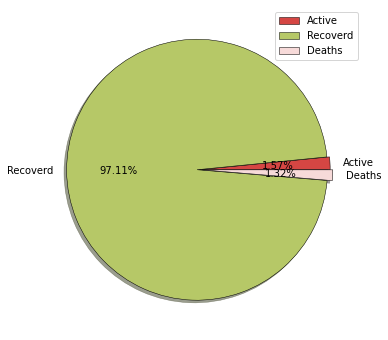

In [126]:
#plotting the pie chart of active , recovered , deaths 
plt.figure(figsize=(6 , 6))
plt.pie(pie_data , explode = ex_plode  , colors = kolor , labels =plot_labels ,  shadow = True , 
        autopct='%1.2f%%' , wedgeprops = {"edgecolor" : "black" ,
                                          "linewidth" : 0.5 ,
                                           "antialiased" : True})
plt.legend()

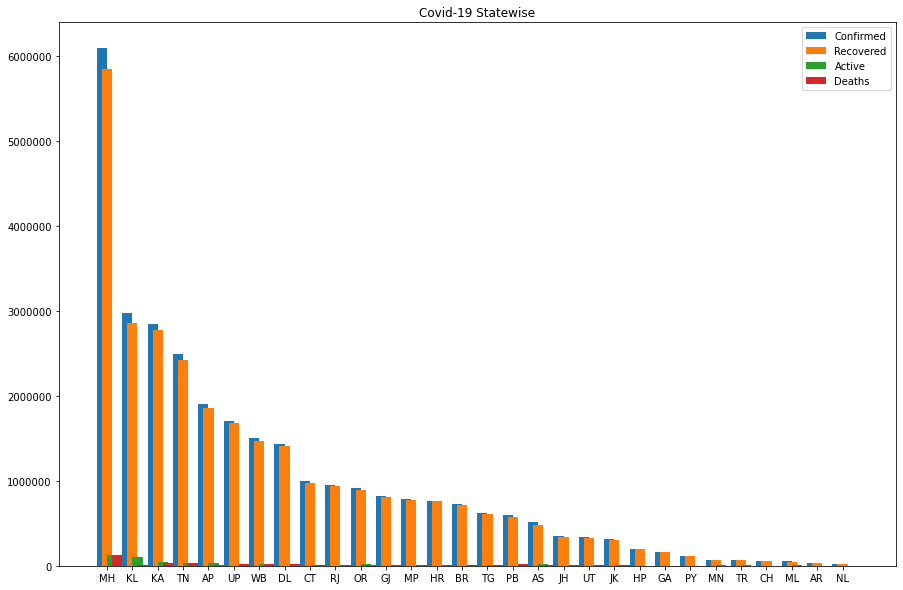

In [127]:
#separating top 30 states data amd plotting its active , confirmed , ecoverd and deaths on bar graph
state_data = co_data[1:]
state_data = state_data.nlargest(30 ,'Confirmed'  )
width = 0.4
ind = np.arange(30)
states = state_data['State_code']
confirmed = state_data['Confirmed']
recovered = state_data['Recovered']
deaths = state_data['Deaths']
active = state_data['Active']
plt.figure(figsize=(15 , 10))
plt.bar(ind+width/2 , confirmed , align='edge', width = width , label = 'Confirmed')
plt.bar(ind+width , recovered , align='edge', width = width , label = 'Recovered')
plt.bar(ind+3*width/2 , active , align='edge' , width = width , label = 'Active')
plt.bar(ind+2*width , deaths , align='edge' , width = width , label = 'Deaths')
plt.title('Covid-19 Statewise')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(ind + 3*width/2, states  )
plt.legend()
plt.show()

In [128]:
#importong daily data of covid
data1 = pd.read_csv(r"https://api.covid19india.org/csv/latest/case_time_series.csv")
data1.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,521.000000,5.210000e+02,521.000000,5.210000e+02,521.000000,521.000000
mean,58626.760077,8.179089e+06,56910.735125,7.460514e+06,770.522073,110080.679463
std,86048.888211,8.655182e+06,84095.955507,8.054764e+06,1061.058267,104869.408773
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,9353.000000,2.660210e+05,5634.000000,1.290190e+05,111.000000,7477.000000
50%,28869.000000,7.430844e+06,26407.000000,6.521788e+06,413.000000,112447.000000
75%,65610.000000,1.102947e+07,64475.000000,1.072429e+07,929.000000,156010.000000
max,414280.000000,3.054454e+07,422391.000000,2.965049e+07,6139.000000,401442.000000


In [129]:
data1 = data1 [2:]
data1 = data1.iloc[::31]
data1['Date_YMD'] = pd.to_datetime(data1['Date_YMD'] )
data1['Date'] = data1['Date'].str[2:]
data1

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
2,February 2020,2020-02-01,0,1,0,0,0,0
33,March 2020,2020-03-03,1,6,0,3,0,0
64,April 2020,2020-04-03,560,3105,39,230,14,83
95,May 2020,2020-05-04,3656,46434,1082,12845,103,1566
126,June 2020,2020-06-04,9847,226723,4390,108454,274,6362
157,July 2020,2020-07-05,23942,697849,15829,424895,421,19703
188,August 2020,2020-08-05,56626,1963253,45583,1327134,919,40754
219,September 2020,2020-09-05,90600,4110852,73161,3177666,916,70095
250,October 2020,2020-10-06,71869,6754191,81945,5741231,990,104005
281,November 2020,2020-11-06,50017,8460974,53946,7818542,577,125014


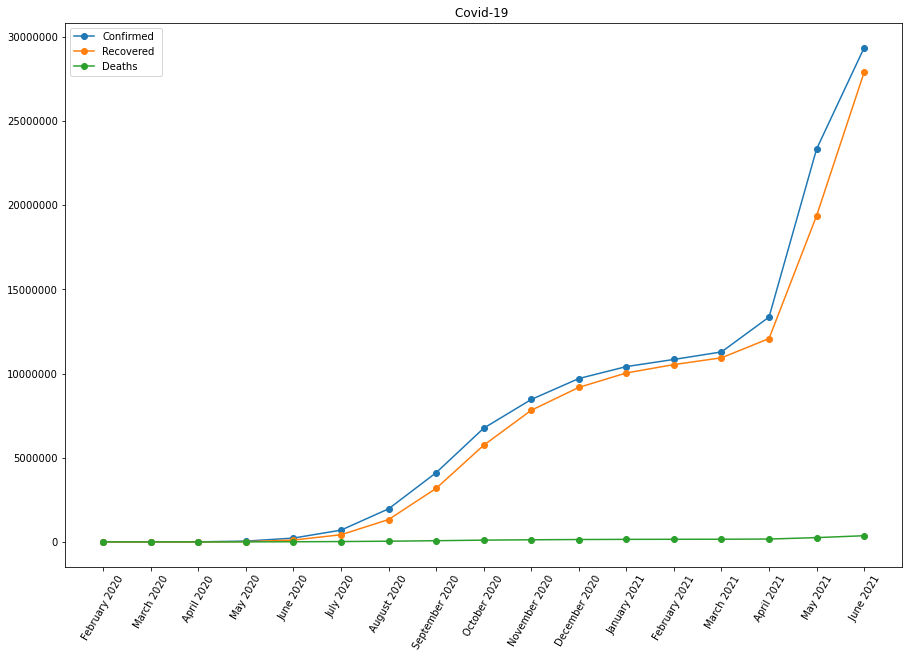

In [130]:
#plotting monthly trends of covud since start of the pandemic in india 
date = data1['Date']
total_c = data1['Total Confirmed']
total_r = data1['Total Recovered']
total_d = data1['Total Deceased']
plt.figure(figsize=(15 , 10))
plt.plot(date , total_c , marker = 'o' , label = 'Confirmed'  )
plt.title('Covid-19 ')
plt.plot(date , total_r , marker='o' , label = 'Recovered '  )
plt.plot(date , total_d , marker='o' , label = 'Deaths '  )
plt.ticklabel_format(style='sci', axis='y', scilimits=(-10000000,100000000))
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [131]:
#calculating death rate of each state
state_data['death rate'] = (state_data['Deaths'].astype(int)/state_data['Confirmed'])*100
state_data = state_data.sort_values('death rate' , ascending = False)

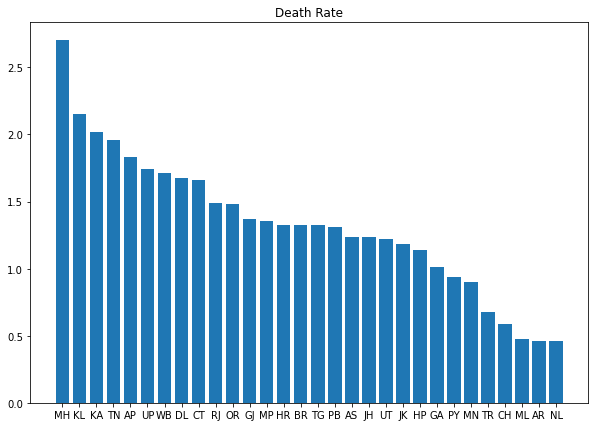

In [132]:
#plotting death rate of states on graph
death_rate = state_data['death rate']
plt.figure(figsize= (10 , 7))
plt.bar(states , death_rate)
plt.title('Death Rate')
plt.show()

In [133]:
#calculating recovery rate of each state
state_data['recovery rate'] = (state_data['Recovered'].astype(int)/state_data['Confirmed'])*100
state_data = state_data.sort_values('recovery rate' , ascending = False)

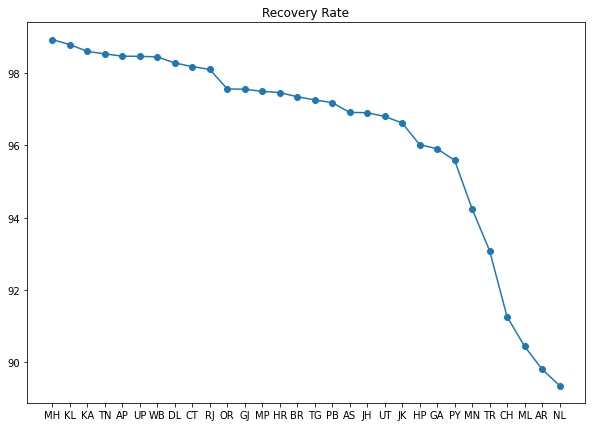

In [134]:
#plotting recovery rate of states on graph in descending order
recovery_rate = state_data['recovery rate']
plt.figure(figsize= (10 , 7))
plt.plot(states , recovery_rate , marker = 'o')
plt.title('Recovery Rate')
plt.show()